In [1]:
import pandas as pd

# Google developer API key
#from config import gkey

# Configure gmaps
#gmaps.configure(api_key=gkey)

# Data for 2007

In [127]:
#import data from csv files
file_jobs_2007=pd.read_csv("Idea1/business_2007.csv")
file_jobs_2007.head(2)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBERS OF FIRMS,NUMBERS OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLL (1000),ANNUAL PAYROLL NOISE FLAG,ESTIMATED RECEIPTS (1000),ESTIMATED RECEIPT NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,01: Total,969,1037,10100,NaN,G,308439,G,2827746,H
1,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,02: 0-4,516,516,934,NaN,G,26472,G,196261,G


In [128]:
file_jobs_2007_clean=file_jobs_2007.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBERS OF ESTABLISHMENTS': 'Establishments 2007',
                                                   'EMPLOYMENT': 'Employment 2007',
                                                   'ANNUAL PAYROLL (1000)': "Annual Payroll 2007"})
file_jobs_2007_clean.head(2)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBERS OF FIRMS,Establishments 2007,Employment 2007,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2007,ANNUAL PAYROLL NOISE FLAG,ESTIMATED RECEIPTS (1000),ESTIMATED RECEIPT NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,01: Total,969,1037,10100,NaN,G,308439,G,2827746,H
1,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,02: 0-4,516,516,934,NaN,G,26472,G,196261,G


In [129]:
jobs_2007=file_jobs_2007_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2007','Employment 2007', 'Annual Payroll 2007']]
jobs_2007.head()

,Metro Area,Industry,Filter,Establishments 2007,Employment 2007,Annual Payroll 2007
0,"Abbeville, LA Micropolitan Statistical Area",Total,01: Total,1037,10100,308439
1,"Abbeville, LA Micropolitan Statistical Area",Total,02: 0-4,516,934,26472
2,"Abbeville, LA Micropolitan Statistical Area",Total,03: 5-9,161,1019,22801
3,"Abbeville, LA Micropolitan Statistical Area",Total,04: 10-19,97,1211,33120
4,"Abbeville, LA Micropolitan Statistical Area",Total,05: <20,774,3164,82393


In [130]:
cities_2007=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2007=['Mining', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2007=['01:   Total']

In [131]:
jobs_2007_cities=jobs_2007[jobs_2007['Metro Area'].isin(cities_2007)]
jobs_2007_ind=jobs_2007_cities[jobs_2007_cities['Industry'].isin(industries_2007)]
jobs_2007_filtered=jobs_2007_ind[jobs_2007_ind['Filter'].isin(filters_2007)]
jobs_2007_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2007,Employment 2007,Annual Payroll 2007
9272,"Austin-Round Rock, TX Metropolitan Statistical...",Mining,01: Total,167,1668,86654
9299,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,01: Total,1239,48312,2608297
9335,"Austin-Round Rock, TX Metropolitan Statistical...",Information,01: Total,1007,24509,1764534
9344,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and Insurance,01: Total,2805,31890,2003265
9362,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, Scientific, and Technical Services",01: Total,6239,61307,4263545
17222,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Mining,01: Total,42,523,26107
17249,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,01: Total,5054,179741,11618709
17285,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,01: Total,2994,91919,7655203
17294,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and Insurance,01: Total,7625,184988,19940756
17312,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, Scientific, and Technical Services",01: Total,18095,229615,20279071


In [192]:
jobs_2007_filtered=jobs_2007_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2007_filtered=jobs_2007_filtered[['Metro Area', 'Industry', 'Establishments 2007','Employment 2007', 'Annual Payroll 2007']]
jobs_2007_filtered.head()

,Metro Area,Industry,Establishments 2007,Employment 2007,Annual Payroll 2007
9272,Austin,Mining,167,1668,86654
9299,Austin,Manufacturing,1239,48312,2608297
9335,Austin,Information,1007,24509,1764534
9344,Austin,Finance and Insurance,2805,31890,2003265
9362,Austin,"Professional, Scientific, and Technical Services",6239,61307,4263545


# Data for 2008

In [137]:
#import data from csv files
file_jobs_2008=pd.read_csv("Idea1/business_2008.csv")
file_jobs_2008.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,962,1031,10120,NaN,G,327131,G


In [138]:
file_jobs_2008_clean=file_jobs_2008.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2008',
                                                   'EMPLOYMENT': 'Employment 2008',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2008"})
file_jobs_2008_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2008,Employment 2008,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2008,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,962,1031,10120,NaN,G,327131,G


In [139]:
jobs_2008=file_jobs_2008_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2008','Employment 2008', 'Annual Payroll 2008']]
jobs_2008.head(1)

,Metro Area,Industry,Filter,Establishments 2008,Employment 2008,Annual Payroll 2008
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1031,10120,327131


In [140]:
cities_2008=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2008=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2008=['1:   Total']

In [141]:
jobs_2008_cities=jobs_2008[jobs_2008['Metro Area'].isin(cities_2008)]
jobs_2008_ind=jobs_2008_cities[jobs_2008_cities['Industry'].isin(industries_2008)]
jobs_2008_filtered=jobs_2008_ind[jobs_2008_ind['Filter'].isin(filters_2008)]
jobs_2008_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2008,Employment 2008,Annual Payroll 2008
9299,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,180,1864,116587
9326,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1266,45819,2624636
9362,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,981,25837,1873276
9371,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2876,33540,2213091
9389,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6293,64167,4545196
17245,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,48,579,36692
17272,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,5000,175921,10999921
17308,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,3056,91343,7976741
17317,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7629,193053,20961033
17335,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17458,229414,21049908


In [194]:
jobs_2008_filtered=jobs_2008_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2008_filtered=jobs_2008_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})

jobs_2008_filtered=jobs_2008_filtered[['Metro Area', 'Industry', 'Establishments 2008','Employment 2008', 'Annual Payroll 2008']]
jobs_2008_filtered.head()

,Metro Area,Industry,Establishments 2008,Employment 2008,Annual Payroll 2008
9299,Austin,Mining,180,1864,116587
9326,Austin,Manufacturing,1266,45819,2624636
9362,Austin,Information,981,25837,1873276
9371,Austin,Finance and insurance,2876,33540,2213091
9389,Austin,"Professional, Scientific, and Technical Services",6293,64167,4545196


# Data for 2009

In [143]:
#import data from csv files
file_jobs_2009=pd.read_csv("Idea1/business_2009.csv")
file_jobs_2009.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,963,1037,10490,NaN,G,334997,G


In [144]:
file_jobs_2009_clean=file_jobs_2009.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2009',
                                                   'EMPLOYMENT': 'Employment 2009',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2009"})
file_jobs_2009_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2009,Employment 2009,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2009,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,963,1037,10490,NaN,G,334997,G


In [145]:
jobs_2009=file_jobs_2009_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2009', 'Employment 2009', 'Annual Payroll 2009']]
jobs_2009.head(1)

,Metro Area,Industry,Filter,Establishments 2009,Employment 2009,Annual Payroll 2009
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1037,10490,334997


In [146]:
cities_2009=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2009=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2009=['1:   Total']

In [147]:
jobs_2009_cities=jobs_2009[jobs_2009['Metro Area'].isin(cities_2009)]
jobs_2009_ind=jobs_2009_cities[jobs_2009_cities['Industry'].isin(industries_2009)]
jobs_2009_filtered=jobs_2009_ind[jobs_2009_ind['Filter'].isin(filters_2009)]
jobs_2009_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2009,Employment 2009,Annual Payroll 2009
9295,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,184,1680,101458
9322,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1219,42278,2366965
9358,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,964,25888,1840850
9367,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2944,33658,2106507
9385,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6378,64143,4878615
17265,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,45,491,28041
17292,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,4736,159618,9938530
17328,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,2858,87665,7696518
17337,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7393,178630,18530569
17355,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17170,223575,20193936


In [196]:
jobs_2009_filtered=jobs_2009_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2009_filtered=jobs_2009_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})
jobs_2009_filtered=jobs_2009_filtered[['Metro Area', 'Industry', 'Establishments 2009','Employment 2009', 'Annual Payroll 2009']]
jobs_2009_filtered.head()

,Metro Area,Industry,Establishments 2009,Employment 2009,Annual Payroll 2009
9295,Austin,Mining,184,1680,101458
9322,Austin,Manufacturing,1219,42278,2366965
9358,Austin,Information,964,25888,1840850
9367,Austin,Finance and insurance,2944,33658,2106507
9385,Austin,"Professional, Scientific, and Technical Services",6378,64143,4878615


# Data for 2010

In [149]:
#import data from csv files
file_jobs_2010=pd.read_csv("Idea1/business_2010.csv")
file_jobs_2010.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,953,1024,10053,NaN,G,347335,G


In [150]:
file_jobs_2010_clean=file_jobs_2010.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2010',
                                                   'EMPLOYMENT': 'Employment 2010',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2010"})
file_jobs_2010_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2010,Employment 2010,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2010,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,953,1024,10053,NaN,G,347335,G


In [151]:
jobs_2010=file_jobs_2010_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2010', 'Employment 2010', 'Annual Payroll 2010']]
jobs_2010.head(1)

,Metro Area,Industry,Filter,Establishments 2010,Employment 2010,Annual Payroll 2010
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1024,10053,347335


In [152]:
cities_2010=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2010=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2010=['1:   Total']

In [153]:
jobs_2010_cities=jobs_2010[jobs_2010['Metro Area'].isin(cities_2010)]
jobs_2010_ind=jobs_2010_cities[jobs_2010_cities['Industry'].isin(industries_2010)]
jobs_2010_filtered=jobs_2010_ind[jobs_2010_ind['Filter'].isin(filters_2010)]
jobs_2010_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2010,Employment 2010,Annual Payroll 2010
9308,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,189,1769,116021
9335,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1217,34928,2009837
9371,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,972,24245,1813188
9380,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2950,33102,2162166
9398,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6709,64243,5081125
17277,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,47,448,28094
17304,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,4568,151795,9887695
17340,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,2777,83961,7687682
17349,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7210,166857,18895243
17367,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17155,220311,21082177


In [198]:
jobs_2010_filtered=jobs_2010_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2010_filtered=jobs_2010_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})
jobs_2010_filtered=jobs_2010_filtered[['Metro Area', 'Industry', 'Establishments 2010','Employment 2010', 'Annual Payroll 2010']]
jobs_2010_filtered.head()

,Metro Area,Industry,Establishments 2010,Employment 2010,Annual Payroll 2010
9308,Austin,Mining,189,1769,116021
9335,Austin,Manufacturing,1217,34928,2009837
9371,Austin,Information,972,24245,1813188
9380,Austin,Finance and insurance,2950,33102,2162166
9398,Austin,"Professional, Scientific, and Technical Services",6709,64243,5081125


# Data for 2011

In [155]:
#import data from csv files
file_jobs_2011=pd.read_csv("Idea1/business_2011.csv")
file_jobs_2011.head(1)

,FIPS MSA CODE,MSA DESCRIPTION,CODE,NAICS DESCRIPTION,SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,ANNUAL PAYROLLL (1000),NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,954,1034,10165,NaN,G,378700,G


In [156]:
file_jobs_2011_clean=file_jobs_2011.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                    ' SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2011',
                                                   'EMPLOYMENT': 'Employment 2011',
                                                   'ANNUAL PAYROLLL (1000)': "Annual Payroll 2011"})
file_jobs_2011_clean.head(1)

,FIPS MSA CODE,Metro Area,CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2011,Employment 2011,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2011,NOISE FLAG
0,10020,"Abbeville, LA Micropolitan Statistical Area",--,Total,1: Total,954,1034,10165,NaN,G,378700,G


In [157]:
jobs_2011=file_jobs_2011_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2011', 'Employment 2011', 'Annual Payroll 2011']]
jobs_2011.head(1)

,Metro Area,Industry,Filter,Establishments 2011,Employment 2011,Annual Payroll 2011
0,"Abbeville, LA Micropolitan Statistical Area",Total,1: Total,1034,10165,378700


In [158]:
cities_2011=['San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area',
       'Austin-Round Rock, TX Metropolitan Statistical Area',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical']

industries_2011=['Mining, quarrying, and oil and gas extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and insurance', 
            'Professional, scientific, and technical services']
            
filters_2011=['1:   Total']

In [159]:
jobs_2011_cities=jobs_2011[jobs_2011['Metro Area'].isin(cities_2011)]
jobs_2011_ind=jobs_2011_cities[jobs_2011_cities['Industry'].isin(industries_2011)]
jobs_2011_filtered=jobs_2011_ind[jobs_2011_ind['Filter'].isin(filters_2011)]
jobs_2011_filtered.head(10)

,Metro Area,Industry,Filter,Establishments 2011,Employment 2011,Annual Payroll 2011
9309,"Austin-Round Rock, TX Metropolitan Statistical...","Mining, quarrying, and oil and gas extraction",1: Total,206,2073,139238
9336,"Austin-Round Rock, TX Metropolitan Statistical...",Manufacturing,1: Total,1225,36452,2310570
9372,"Austin-Round Rock, TX Metropolitan Statistical...",Information,1: Total,990,24060,1784095
9381,"Austin-Round Rock, TX Metropolitan Statistical...",Finance and insurance,1: Total,2967,32226,2250215
9399,"Austin-Round Rock, TX Metropolitan Statistical...","Professional, scientific, and technical services",1: Total,6897,64489,5216742
17303,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Mining, quarrying, and oil and gas extraction",1: Total,45,465,32156
17330,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Manufacturing,1: Total,4487,150141,10652314
17366,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Information,1: Total,2787,81632,7477652
17375,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...",Finance and insurance,1: Total,7119,167074,20047142
17393,"Boston-Cambridge-Quincy, MA-NH Metropolitan St...","Professional, scientific, and technical services",1: Total,17030,220434,22201231


In [200]:
jobs_2011_filtered=jobs_2011_filtered.replace({'San Francisco-Oakland-Fremont, CA Metropolitan Statistical Area': 'San Francisco',
       'Houston-Sugar Land-Baytown, TX Metropolitan Statistical Area': "Houston",
       'Austin-Round Rock, TX Metropolitan Statistical Area': 'Austin',
       'Detroit-Warren-Livonia, MI Metropolitan Statistical Area': 'Detroit',
       'Chicago-Naperville-Joliet, IL-IN-WI Metropolitan Statistical Area': 'Chicago',
       'Boston-Cambridge-Quincy, MA-NH Metropolitan Statistical Area': 'Boston',
       'New York-Northern New Jersey-Long Island, NY-NJ-PA Metropolitan Statistical': 'New York'
})

jobs_2011_filtered=jobs_2011_filtered.replace({'Mining, quarrying, and oil and gas extraction': 'Mining',
                                              'Professional, scientific, and technical services':'Professional, Scientific, and Technical Services'})
jobs_2011_filtered=jobs_2011_filtered[['Metro Area', 'Industry', 'Establishments 2011','Employment 2011', 'Annual Payroll 2011']]
jobs_2011_filtered.head()

,Metro Area,Industry,Establishments 2011,Employment 2011,Annual Payroll 2011
9309,Austin,Mining,206,2073,139238
9336,Austin,Manufacturing,1225,36452,2310570
9372,Austin,Information,990,24060,1784095
9381,Austin,Finance and insurance,2967,32226,2250215
9399,Austin,"Professional, Scientific, and Technical Services",6897,64489,5216742


# Data for 2012

In [161]:
#import data from csv files
file_jobs_2012=pd.read_csv("Idea1/business_2012.csv")
file_jobs_2012.head()

,FIPS MSA CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG,"ESTIMATED RECEIPTS ($1,000)",ESTIMATED RECEIPTS NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,1: Total,1328,1408,18652,NaN,G,649811,G,6562426,G
1,10100,"Aberdeen, SD Micro Area",--,Total,2: 0-4,674,674,1163,NaN,G,38444,G,264661,G
2,10100,"Aberdeen, SD Micro Area",--,Total,3: 5-9,217,217,1475,NaN,G,41853,G,276775,G
3,10100,"Aberdeen, SD Micro Area",--,Total,4: 10-19,137,139,1753,NaN,G,55563,G,392579,G
4,10100,"Aberdeen, SD Micro Area",--,Total,5: <20,1028,1030,4391,NaN,G,135860,G,934015,G


In [162]:
file_jobs_2012_clean=file_jobs_2012.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2012',
                                                    'EMPLOYMENT': "Employment 2012",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2012"
                                                   })
file_jobs_2012_clean.head()

,FIPS MSA CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2012,Employment 2012,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2012,ANNUAL PAYROLL NOISE FLAG,"ESTIMATED RECEIPTS ($1,000)",ESTIMATED RECEIPTS NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,1: Total,1328,1408,18652,NaN,G,649811,G,6562426,G
1,10100,"Aberdeen, SD Micro Area",--,Total,2: 0-4,674,674,1163,NaN,G,38444,G,264661,G
2,10100,"Aberdeen, SD Micro Area",--,Total,3: 5-9,217,217,1475,NaN,G,41853,G,276775,G
3,10100,"Aberdeen, SD Micro Area",--,Total,4: 10-19,137,139,1753,NaN,G,55563,G,392579,G
4,10100,"Aberdeen, SD Micro Area",--,Total,5: <20,1028,1030,4391,NaN,G,135860,G,934015,G


In [163]:
jobs_2012=file_jobs_2012_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2012', 'Employment 2012', 'Annual Payroll 2012']]
jobs_2012.head()

,Metro Area,Industry,Filter,Establishments 2012,Employment 2012,Annual Payroll 2012
0,"Aberdeen, SD Micro Area",Total,1: Total,1408,18652,649811
1,"Aberdeen, SD Micro Area",Total,2: 0-4,674,1163,38444
2,"Aberdeen, SD Micro Area",Total,3: 5-9,217,1475,41853
3,"Aberdeen, SD Micro Area",Total,4: 10-19,139,1753,55563
4,"Aberdeen, SD Micro Area",Total,5: <20,1030,4391,135860


In [164]:
cities_2012=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2012=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2012=['1:   Total']

In [165]:
jobs_2012_cities=jobs_2012[jobs_2012['Metro Area'].isin(cities_2012)]
jobs_2012_ind=jobs_2012_cities[jobs_2012_cities['Industry'].isin(industries_2012)]
jobs_2012_filtered=jobs_2012_ind[jobs_2012_ind['Filter'].isin(filters_2012)]
jobs_2012_filtered.head()

,Metro Area,Industry,Filter,Establishments 2012,Employment 2012,Annual Payroll 2012
8615,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",1: Total,205,2027,157791
8642,"Austin-Round Rock, TX Metro Area",Manufacturing,1: Total,1298,37421,2384511
8678,"Austin-Round Rock, TX Metro Area",Information,1: Total,1072,27457,2150649
8687,"Austin-Round Rock, TX Metro Area",Finance and Insurance,1: Total,3232,34212,2622786
8705,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",1: Total,7277,69806,5546267


In [202]:
jobs_2012_filtered=jobs_2012_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2012_filtered=jobs_2012_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2012_filtered=jobs_2012_filtered[['Metro Area', 'Industry', 'Establishments 2012','Employment 2012', 'Annual Payroll 2012']]
jobs_2012_filtered.head()

,Metro Area,Industry,Establishments 2012,Employment 2012,Annual Payroll 2012
8615,Austin,Mining,205,2027,157791
8642,Austin,Manufacturing,1298,37421,2384511
8678,Austin,Information,1072,27457,2150649
8687,Austin,Finance and Insurance,3232,34212,2622786
8705,Austin,"Professional, Scientific, and Technical Services",7277,69806,5546267


# Data for 2013

In [167]:
#import data from csv files
file_jobs_2013=pd.read_csv("Idea1/business_2013.csv")
file_jobs_2013.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1318,1396,19294,NaN,G,665648,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,655,1165,NaN,H,39487,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,219,219,1437,NaN,G,44289,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,144,148,1851,NaN,G,57902,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4453,NaN,G,141678,G


In [168]:
file_jobs_2013_clean=file_jobs_2013.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2013',
                                                    'EMPLOYMENT': "Employment 2013",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2013"
                                                   })
file_jobs_2013_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2013,Employment 2013,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2013,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1318,1396,19294,NaN,G,665648,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,655,1165,NaN,H,39487,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,219,219,1437,NaN,G,44289,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,144,148,1851,NaN,G,57902,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4453,NaN,G,141678,G


In [169]:
jobs_2013=file_jobs_2013_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2013', 'Employment 2013', 'Annual Payroll 2013']]
jobs_2013.head()

,Metro Area,Industry,Filter,Establishments 2013,Employment 2013,Annual Payroll 2013
0,"Aberdeen, SD Micro Area",Total,01: Total,1396,19294,665648
1,"Aberdeen, SD Micro Area",Total,02: 0-4,655,1165,39487
2,"Aberdeen, SD Micro Area",Total,03: 5-9,219,1437,44289
3,"Aberdeen, SD Micro Area",Total,04: 10-19,148,1851,57902
4,"Aberdeen, SD Micro Area",Total,05: <20,1022,4453,141678


In [170]:
cities_2013=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2013=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2013=['01:  Total']

In [171]:
jobs_2013_cities=jobs_2013[jobs_2013['Metro Area'].isin(cities_2013)]
jobs_2013_ind=jobs_2013_cities[jobs_2013_cities['Industry'].isin(industries_2013)]
jobs_2013_filtered=jobs_2013_ind[jobs_2013_ind['Filter'].isin(filters_2013)]
jobs_2013_filtered.head()

,Metro Area,Industry,Filter,Establishments 2013,Employment 2013,Annual Payroll 2013
8667,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,206,2205,174279
8694,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1270,41963,2833819
8730,"Austin-Round Rock, TX Metro Area",Information,01: Total,1073,28043,2195644
8739,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3290,34019,2722495
8757,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,7591,74214,6403975


In [204]:
jobs_2013_filtered=jobs_2013_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2013_filtered=jobs_2013_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2013_filtered=jobs_2013_filtered[['Metro Area', 'Industry', 'Establishments 2013','Employment 2013', 'Annual Payroll 2013']]
jobs_2013_filtered.head()

,Metro Area,Industry,Establishments 2013,Employment 2013,Annual Payroll 2013
8667,Austin,Mining,206,2205,174279
8694,Austin,Manufacturing,1270,41963,2833819
8730,Austin,Information,1073,28043,2195644
8739,Austin,Finance and Insurance,3290,34019,2722495
8757,Austin,"Professional, Scientific, and Technical Services",7591,74214,6403975


# Data for 2014

In [173]:
#import data from csv files
file_jobs_2014=pd.read_csv("Idea1/business_2014.csv")
file_jobs_2014.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1328,1404,19575,NaN,G,696915,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,647,647,1106,NaN,G,37038,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,217,217,1438,NaN,G,44117,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,145,148,1811,NaN,G,57742,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1009,1012,4355,NaN,G,138897,G


In [174]:
file_jobs_2014_clean=file_jobs_2014.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2014',
                                                    'EMPLOYMENT': "Employment 2014",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2014"
                                                   })
file_jobs_2014_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2014,Employment 2014,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2014,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1328,1404,19575,NaN,G,696915,G
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,647,647,1106,NaN,G,37038,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,217,217,1438,NaN,G,44117,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,145,148,1811,NaN,G,57742,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1009,1012,4355,NaN,G,138897,G


In [175]:
jobs_2014=file_jobs_2014_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2014', 'Employment 2014', 'Annual Payroll 2014']]
jobs_2014.head()

,Metro Area,Industry,Filter,Establishments 2014,Employment 2014,Annual Payroll 2014
0,"Aberdeen, SD Micro Area",Total,01: Total,1404,19575,696915
1,"Aberdeen, SD Micro Area",Total,02: 0-4,647,1106,37038
2,"Aberdeen, SD Micro Area",Total,03: 5-9,217,1438,44117
3,"Aberdeen, SD Micro Area",Total,04: 10-19,148,1811,57742
4,"Aberdeen, SD Micro Area",Total,05: <20,1012,4355,138897


In [176]:
cities_2014=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2014=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2014=['01:  Total']

In [177]:
jobs_2014_cities=jobs_2014[jobs_2014['Metro Area'].isin(cities_2014)]
jobs_2014_ind=jobs_2014_cities[jobs_2014_cities['Industry'].isin(industries_2014)]
jobs_2014_filtered=jobs_2014_ind[jobs_2014_ind['Filter'].isin(filters_2014)]
jobs_2014_filtered.head()

,Metro Area,Industry,Filter,Establishments 2014,Employment 2014,Annual Payroll 2014
8661,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,216,2440,202590
8688,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1299,42592,2824143
8724,"Austin-Round Rock, TX Metro Area",Information,01: Total,1129,31857,2998574
8733,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3217,34508,2853432
8751,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,7984,78996,6963470


In [206]:
jobs_2014_filtered=jobs_2014_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2014_filtered=jobs_2014_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2014_filtered=jobs_2014_filtered[['Metro Area', 'Industry', 'Establishments 2014','Employment 2014', 'Annual Payroll 2014']]
jobs_2014_filtered.head()

,Metro Area,Industry,Establishments 2014,Employment 2014,Annual Payroll 2014
8661,Austin,Mining,216,2440,202590
8688,Austin,Manufacturing,1299,42592,2824143
8724,Austin,Information,1129,31857,2998574
8733,Austin,Finance and Insurance,3217,34508,2853432
8751,Austin,"Professional, Scientific, and Technical Services",7984,78996,6963470


# Data for 2015

In [179]:
#import data from csv files
file_jobs_2015=pd.read_csv("Idea1/business_2015.csv", encoding = "ISO-8859-1")
file_jobs_2015.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1337,1411,19778,NaN,G,748033,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,656,1105,NaN,H,39854,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,224,224,1518,NaN,G,48227,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,142,145,1815,NaN,G,62092,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1021,1025,4438,NaN,G,150173,G


In [180]:
file_jobs_2015_clean=file_jobs_2015.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2015',
                                                    'EMPLOYMENT': "Employment 2015",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2015"
                                                   })
file_jobs_2015_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2015,Employment 2015,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2015,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1337,1411,19778,NaN,G,748033,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,655,656,1105,NaN,H,39854,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,224,224,1518,NaN,G,48227,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,142,145,1815,NaN,G,62092,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1021,1025,4438,NaN,G,150173,G


In [181]:
jobs_2015=file_jobs_2015_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2015', 'Employment 2015', 'Annual Payroll 2015']]
jobs_2015.head()

,Metro Area,Industry,Filter,Establishments 2015,Employment 2015,Annual Payroll 2015
0,"Aberdeen, SD Micro Area",Total,01: Total,1411,19778,748033
1,"Aberdeen, SD Micro Area",Total,02: 0-4,656,1105,39854
2,"Aberdeen, SD Micro Area",Total,03: 5-9,224,1518,48227
3,"Aberdeen, SD Micro Area",Total,04: 10-19,145,1815,62092
4,"Aberdeen, SD Micro Area",Total,05: <20,1025,4438,150173


In [182]:
cities_2015=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2015=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2015=['01:  Total']

In [183]:
jobs_2015_cities=jobs_2015[jobs_2015['Metro Area'].isin(cities_2015)]
jobs_2015_ind=jobs_2015_cities[jobs_2015_cities['Industry'].isin(industries_2015)]
jobs_2015_filtered=jobs_2015_ind[jobs_2015_ind['Filter'].isin(filters_2015)]
jobs_2015_filtered.head()

,Metro Area,Industry,Filter,Establishments 2015,Employment 2015,Annual Payroll 2015
8637,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,209,2468,175677
8664,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1338,40823,2635077
8700,"Austin-Round Rock, TX Metro Area",Information,01: Total,1184,34346,3227622
8709,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3305,36508,3142947
8727,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,8433,85828,7959042


In [208]:
jobs_2015_filtered=jobs_2015_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2015_filtered=jobs_2015_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2015_filtered=jobs_2015_filtered[['Metro Area', 'Industry', 'Establishments 2015','Employment 2015', 'Annual Payroll 2015']]
jobs_2015_filtered.head()

,Metro Area,Industry,Establishments 2015,Employment 2015,Annual Payroll 2015
8637,Austin,Mining,209,2468,175677
8664,Austin,Manufacturing,1338,40823,2635077
8700,Austin,Information,1184,34346,3227622
8709,Austin,Finance and Insurance,3305,36508,3142947
8727,Austin,"Professional, Scientific, and Technical Services",8433,85828,7959042


# Data for 2016

In [185]:
#import data from csv files
file_jobs_2016=pd.read_csv("Idea1/business_2016.csv", encoding = "ISO-8859-1")
file_jobs_2016.head()

,FIPS CODE,MSA DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1342,1418,19533,NaN,G,746190,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,663,663,1076,NaN,H,41114,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,216,216,1442,NaN,G,45082,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,139,143,1759,NaN,G,58959,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4277,NaN,G,145155,G


In [186]:
file_jobs_2016_clean=file_jobs_2016.rename(columns={'MSA DESCRIPTION': 'Metro Area',
                                                   'NAICS DESCRIPTION': 'Industry',
                                                   'ENTERPRISE EMPLOYMENT SIZE': 'Filter',
                                                   'NUMBER OF ESTABLISHMENTS': 'Establishments 2016',
                                                    'EMPLOYMENT': "Employment 2016",
                                                    'ANNUAL PAYROLL ($1,000)': "Annual Payroll 2016"
                                                   })
file_jobs_2016_clean.head()

,FIPS CODE,Metro Area,NAICS CODE,Industry,Filter,NUMBER OF FIRMS,Establishments 2016,Employment 2016,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,Annual Payroll 2016,ANNUAL PAYROLL NOISE FLAG
0,10100,"Aberdeen, SD Micro Area",--,Total,01: Total,1342,1418,19533,NaN,G,746190,H
1,10100,"Aberdeen, SD Micro Area",--,Total,02: 0-4,663,663,1076,NaN,H,41114,G
2,10100,"Aberdeen, SD Micro Area",--,Total,03: 5-9,216,216,1442,NaN,G,45082,G
3,10100,"Aberdeen, SD Micro Area",--,Total,04: 10-19,139,143,1759,NaN,G,58959,G
4,10100,"Aberdeen, SD Micro Area",--,Total,05: <20,1018,1022,4277,NaN,G,145155,G


In [187]:
jobs_2016=file_jobs_2016_clean[['Metro Area', 'Industry', 'Filter', 'Establishments 2016', 'Employment 2016', 'Annual Payroll 2016']]
jobs_2016.head()

,Metro Area,Industry,Filter,Establishments 2016,Employment 2016,Annual Payroll 2016
0,"Aberdeen, SD Micro Area",Total,01: Total,1418,19533,746190
1,"Aberdeen, SD Micro Area",Total,02: 0-4,663,1076,41114
2,"Aberdeen, SD Micro Area",Total,03: 5-9,216,1442,45082
3,"Aberdeen, SD Micro Area",Total,04: 10-19,143,1759,58959
4,"Aberdeen, SD Micro Area",Total,05: <20,1022,4277,145155


In [188]:
cities_2016=['San Francisco-Oakland-Hayward, CA Metro Area',
       'Houston-The Woodlands-Sugar Land, TX Metro Area',
       'Austin-Round Rock, TX Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area']

industries_2016=['Mining, Quarrying, and Oil and Gas Extraction', 
            'Manufacturing', 
            'Information', 
            'Finance and Insurance', 
            'Professional, Scientific, and Technical Services']
            
filters_2016=['01:  Total']

In [189]:
jobs_2016_cities=jobs_2016[jobs_2016['Metro Area'].isin(cities_2016)]
jobs_2016_ind=jobs_2016_cities[jobs_2016_cities['Industry'].isin(industries_2016)]
jobs_2016_filtered=jobs_2016_ind[jobs_2016_ind['Filter'].isin(filters_2016)]
jobs_2016_filtered.head()

,Metro Area,Industry,Filter,Establishments 2016,Employment 2016,Annual Payroll 2016
8627,"Austin-Round Rock, TX Metro Area","Mining, Quarrying, and Oil and Gas Extraction",01: Total,187,2138,155541
8654,"Austin-Round Rock, TX Metro Area",Manufacturing,01: Total,1376,40296,2664829
8690,"Austin-Round Rock, TX Metro Area",Information,01: Total,1205,35538,3214259
8699,"Austin-Round Rock, TX Metro Area",Finance and Insurance,01: Total,3579,37432,3297696
8717,"Austin-Round Rock, TX Metro Area","Professional, Scientific, and Technical Services",01: Total,8805,102096,9848185


In [210]:
jobs_2016_filtered=jobs_2016_filtered.replace({'San Francisco-Oakland-Hayward, CA Metro Area': 'San Francisco',
       'Houston-The Woodlands-Sugar Land, TX Metro Area': 'Houston',
       'Austin-Round Rock, TX Metro Area': "Austin",
       'Detroit-Warren-Dearborn, MI Metro Area': 'Detroit',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area': 'Chicago',
       'Boston-Cambridge-Newton, MA-NH Metro Area': 'Boston',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area': 'New York'
})

jobs_2016_filtered=jobs_2016_filtered.replace({'Mining, Quarrying, and Oil and Gas Extraction': 'Mining'})
jobs_2016_filtered=jobs_2016_filtered[['Metro Area', 'Industry', 'Establishments 2016','Employment 2016', 'Annual Payroll 2016']]
jobs_2016_filtered.head()

,Metro Area,Industry,Establishments 2016,Employment 2016,Annual Payroll 2016
8627,Austin,Mining,187,2138,155541
8654,Austin,Manufacturing,1376,40296,2664829
8690,Austin,Information,1205,35538,3214259
8699,Austin,Finance and Insurance,3579,37432,3297696
8717,Austin,"Professional, Scientific, and Technical Services",8805,102096,9848185


# Merging data into one dataframe

In [211]:
jobs_df_78=pd.merge(jobs_2007_filtered, jobs_2008_filtered, on=['Metro Area', 'Industry'], how='inner')
jobs_df_910=pd.merge(jobs_2009_filtered, jobs_2010_filtered, on=['Metro Area', 'Industry'], how='inner')
jobs_df_1112=pd.merge(jobs_2011_filtered, jobs_2012_filtered, on=['Metro Area', 'Industry'], how='inner')
jobs_df_1314=pd.merge(jobs_2013_filtered, jobs_2014_filtered, on=['Metro Area', 'Industry'], how='inner')
jobs_df_1516=pd.merge(jobs_2015_filtered, jobs_2016_filtered, on=['Metro Area', 'Industry'], how='inner')

In [212]:
#merging combined dataframes
jobs_df_7_10=pd.merge(jobs_df_78, jobs_df_910, on=['Metro Area', 'Industry'], how='inner')
jobs_df_11_14=pd.merge(jobs_df_1112, jobs_df_1314, on=['Metro Area', 'Industry'], how='inner')
jobs_df_7_14=pd.merge(jobs_df_7_10, jobs_df_11_14, on=['Metro Area', 'Industry'], how='inner')

In [213]:
jobs_df=pd.merge(jobs_df_7_14, jobs_df_1516, on=['Metro Area', 'Industry'], how='inner')
jobs_df.head()

,Metro Area,Industry,Establishments 2007,Employment 2007,Annual Payroll 2007,Establishments 2008,Employment 2008,Annual Payroll 2008,Establishments 2009,Employment 2009,...,Annual Payroll 2013,Establishments 2014,Employment 2014,Annual Payroll 2014,Establishments 2015,Employment 2015,Annual Payroll 2015,Establishments 2016,Employment 2016,Annual Payroll 2016
0,Austin,Mining,167,1668,86654,180,1864,116587,184,1680,...,174279,216,2440,202590,209,2468,175677,187,2138,155541
1,Austin,Manufacturing,1239,48312,2608297,1266,45819,2624636,1219,42278,...,2833819,1299,42592,2824143,1338,40823,2635077,1376,40296,2664829
2,Austin,Information,1007,24509,1764534,981,25837,1873276,964,25888,...,2195644,1129,31857,2998574,1184,34346,3227622,1205,35538,3214259
3,Austin,"Professional, Scientific, and Technical Services",6239,61307,4263545,6293,64167,4545196,6378,64143,...,6403975,7984,78996,6963470,8433,85828,7959042,8805,102096,9848185
4,Boston,Mining,42,523,26107,48,579,36692,45,491,...,25724,46,387,29341,41,373,27708,41,402,28009


In [214]:
#renaming industries in order to group
jobs_df=jobs_df.replace({'Mining': 'Manufacturing',
                         'Information': "Tech-related",
                        'Professional, Scientific, and Technical Services': 'Tech-related'})

jobs_df.head()

,Metro Area,Industry,Establishments 2007,Employment 2007,Annual Payroll 2007,Establishments 2008,Employment 2008,Annual Payroll 2008,Establishments 2009,Employment 2009,...,Annual Payroll 2013,Establishments 2014,Employment 2014,Annual Payroll 2014,Establishments 2015,Employment 2015,Annual Payroll 2015,Establishments 2016,Employment 2016,Annual Payroll 2016
0,Austin,Manufacturing,167,1668,86654,180,1864,116587,184,1680,...,174279,216,2440,202590,209,2468,175677,187,2138,155541
1,Austin,Manufacturing,1239,48312,2608297,1266,45819,2624636,1219,42278,...,2833819,1299,42592,2824143,1338,40823,2635077,1376,40296,2664829
2,Austin,Tech-related,1007,24509,1764534,981,25837,1873276,964,25888,...,2195644,1129,31857,2998574,1184,34346,3227622,1205,35538,3214259
3,Austin,Tech-related,6239,61307,4263545,6293,64167,4545196,6378,64143,...,6403975,7984,78996,6963470,8433,85828,7959042,8805,102096,9848185
4,Boston,Manufacturing,42,523,26107,48,579,36692,45,491,...,25724,46,387,29341,41,373,27708,41,402,28009


In [215]:
jobs_df_group=jobs_df.groupby(['Metro Area', 'Industry']).sum()
jobs_df_group.head(32)

Establishments 2007  Employment 2007  \
Metro Area    Industry                                              
Austin        Manufacturing                 1406            49980   
              Tech-related                  7246            85816   
Boston        Manufacturing                 5096           180264   
              Tech-related                 21089           321534   
Chicago       Manufacturing                12076           467257   
              Tech-related                 38129           420325   
Detroit       Manufacturing                 5980           229988   
              Tech-related                 13825           217898   
Houston       Manufacturing                 6625           271581   
              Tech-related                 17966           236356   
New York      Manufacturing                18682           429788   
              Tech-related                 81622          1002682   
San Francisco Manufacturing                 4475           133888   
              Tech-related                 22640           331095   

                             Annual Payroll 2007  Establishments 2008  \
Metro Area    Industry                                                  
Austin        Manufacturing              2694951                 1446   
              Tech-related               6028079                 7274   
Boston        Manufacturing             11644816                 5048   
              Tech-related              27934274                20514   
Chicago       Manufacturing             24645988                11827   
              Tech-related              31310123                37342   
Detroit       Manufacturing             13188265                 5857   
              Tech-related              14732233                13275   
Houston       Manufacturing             16026854                 6726   
              Tech-related              18021323                17635   
New York      Manufacturing             22029905                18086   
              Tech-related              83692485                79447   
San Francisco Manufacturing              9595701                 4388   
              Tech-related              29747216                22080   

                             Employment 2008  Annual Payroll 2008  \
Metro Area    Industry                                              
Austin        Manufacturing            47683              2741223   
              Tech-related             90004              6418472   
Boston        Manufacturing           176500             11036613   
              Tech-related            320757             29026649   
Chicago       Manufacturing           465669             25024902   
              Tech-related            429109             32850751   
Detroit       Manufacturing           221478             12014768   
              Tech-related            207927             14534167   
Houston       Manufacturing           251970             17633313   
              Tech-related            242743             19483526   
New York      Manufacturing           411856             21136401   
              Tech-related           1013600             86983410   
San Francisco Manufacturing           137737              9743563   
              Tech-related            337191             31291005   

                             Establishments 2009  Employment 2009  \
Metro Area    Industry                                              
Austin        Manufacturing                 1403            43958   
              Tech-related                  7342            90031   
Boston        Manufacturing                 4781           160109   
              Tech-related                 20028           311240   
Chicago       Manufacturing                11257           409638   
              Tech-related                 36789           415396   
Detroit       Manufacturing                 5523           181746   
              Tech-related   

In [216]:
#creating dataframes for each city for plotting purposes
austin_df=jobs_df_group.loc['Austin', :]
boston_df=jobs_df_group.loc['Boston', :]
chicago_df=jobs_df_group.loc['Chicago', :]
detroit_df=jobs_df_group.loc['Detroit', :]
houston_df=jobs_df_group.loc['Houston', :]
NY_df=jobs_df_group.loc['New York', :]
SF_df=jobs_df_group.loc['San Francisco', :]
austin_df.head()

,Establishments 2007,Employment 2007,Annual Payroll 2007,Establishments 2008,Employment 2008,Annual Payroll 2008,Establishments 2009,Employment 2009,Annual Payroll 2009,Establishments 2010,...,Annual Payroll 2013,Establishments 2014,Employment 2014,Annual Payroll 2014,Establishments 2015,Employment 2015,Annual Payroll 2015,Establishments 2016,Employment 2016,Annual Payroll 2016
Industry,,,,,,,,,,,,,,,,,,,,,
Manufacturing,1406,49980,2694951,1446,47683,2741223,1403,43958,2468423,1406,...,3008098,1515,45032,3026733,1547,43291,2810754,1563,42434,2820370
Tech-related,7246,85816,6028079,7274,90004,6418472,7342,90031,6719465,7681,...,8599619,9113,110853,9962044,9617,120174,11186664,10010,137634,13062444


In [217]:
establishments = ["Establishments 2007", "Establishments 2008", "Establishments 2009", 
                  'Establishments 2010', 'Establishments 2011', 'Establishments 2012',
                 'Establishments 2013', "Establishments 2014", 'Establishments 2015',
                 'Establishments 2016']

employment  = ["Employment  2007", "Employment  2008", "Employment  2009", 
                'Employment  2010', 'Employment  2011', 'Employment  2012',
                'Employment  2013', "Employment  2014", 'Employment  2015',
                'Employment  2016']

payroll  = ["Annual Payroll  2007", "Annual Payroll  2008", "Annual Payroll  2009", 
            'Annual Payroll  2010', 'Annual Payroll  2011', 'Annual Payroll  2012',
            'Annual Payroll  2013', "Annual Payroll  2014", 'Annual Payroll  2015',
            'Annual Payroll  2016']
years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

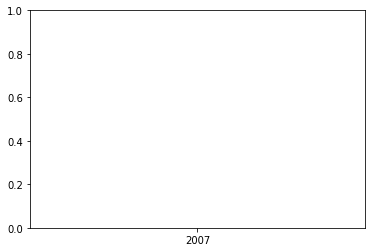

In [219]:
import matplotlib.pyplot as plt

austin_manufacturing_establishments = austin_df.loc['Manufacturing',"Establishments 2007"]

plt.plot(years, int(austin_manufacturing_establishments))

# Population Data

In [ ]:
file_pop_20002009_df=pd.read_csv("Idea1/population_20002010.csv",encoding ='latin-1')
file_pop_20002009_df.head(10)

In [77]:
file_pop_20002009_cleaned_df=file_pop_20002009_df.drop(columns=['SUMLEV', 'STATE',"COUNTY","PLACE","COUSUB","ESTIMATESBASE2000","CENSUS2010POP","POPESTIMATE2010"])
file_pop_20002009_cleaned_df=file_pop_20002009_cleaned_df.rename(columns={"NAME":"CITY","STNAME":"STATE",
                                             "POPESTIMATE2000":"POP_2000",
                                            "POPESTIMATE2001":"POP_2001",
                                            "POPESTIMATE2002":"POP_2002",
                                            "POPESTIMATE2003":"POP_2003",
                                            "POPESTIMATE2004":"POP_2004",
                                            "POPESTIMATE2005":"POP_2005",
                                            "POPESTIMATE2006":"POP_2006",
                                            "POPESTIMATE2007":"POP_2007",
                                            "POPESTIMATE2008":"POP_2008",
                                            "POPESTIMATE2009":"POP_2009"})
cities=["Austin city","Houston city","San Francisco city","Detroit city","Chicago city","Boston city","New York city"]
states=["Texas","California","Illinois","Massachusetts","Michigan","New York"]
#file_pop_20002009_cleaned_df.head()

file_pop_20002009_cleaned_df=file_pop_20002009_cleaned_df[file_pop_20002009_cleaned_df[["CITY"]].isin(cities).any(axis=1)]
file_pop_20002009_cleaned_df=file_pop_20002009_cleaned_df[file_pop_20002009_cleaned_df[["STATE"]].isin(states).any(axis=1)]
file_pop_20002009_cleaned_df.drop_duplicates(subset='CITY', keep='first',inplace=True)  
file_pop_20002009_cleaned_df.reset_index(drop=True,inplace=True)
file_pop_20002009_cleaned_df

NameError: name 'file_pop_20002009_df' is not defined

In [78]:
file_pop_20102018_df=pd.read_csv("Idea1/population_20102018.csv",encoding ='latin-1')
file_pop_20102018_df.head(10)

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4780138,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2688,2684,2677,2629,2612,2595,2588,2573,2566,2563
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4516,4510,4496,4474,4453,4432,4406,4373,4342,4325
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,754,751,751,744,743,740,735,734,728,724
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,356,355,345,345,341,339,337,332,332,330
5,162,1,0,820,0,0,0,A,Alabaster city,Alabama,...,31091,31186,31346,31653,31946,32149,32739,32984,33223,33340
6,162,1,0,988,0,0,0,A,Albertville city,Alabama,...,21209,21224,21391,21436,21425,21356,21395,21451,21493,21568
7,162,1,0,1132,0,0,0,A,Alexander City city,Alabama,...,14984,14930,14890,14764,14836,14787,14658,14618,14572,14467
8,162,1,0,1228,0,0,0,A,Aliceville city,Alabama,...,2481,2480,2426,2418,2392,2368,2359,2343,2335,2301
9,162,1,0,1396,0,0,0,A,Allgood town,Alabama,...,622,622,623,622,621,622,621,621,622,622


In [79]:
file_pop_20102018_cleaned_df=file_pop_20102018_df.drop(columns=['SUMLEV', 'STATE',"COUNTY","PLACE","COUSUB","CONCIT","PRIMGEO_FLAG","FUNCSTAT","ESTIMATESBASE2010","CENSUS2010POP"])
file_pop_20102018_cleaned_df=file_pop_20102018_cleaned_df.rename(columns={"NAME":"CITY","STNAME":"STATE",
                                             "POPESTIMATE2010":"POP_2010",
                                            "POPESTIMATE2011":"POP_2011",
                                            "POPESTIMATE2012":"POP_2012",
                                            "POPESTIMATE2013":"POP_2013",
                                            "POPESTIMATE2014":"POP_2014",
                                            "POPESTIMATE2015":"POP_2015",
                                            "POPESTIMATE2016":"POP_2016",
                                            "POPESTIMATE2017":"POP_2017",
                                            "POPESTIMATE2018":"POP_2018"})
                                            

cities=["Austin city","Houston city","San Francisco city","Detroit city","Chicago city","Boston city","New York city"]
states=["Texas","California","Illinois","Massachusetts","Michigan","New York"]

file_pop_20102018_cleaned_df=file_pop_20102018_cleaned_df[file_pop_20102018_cleaned_df[["CITY"]].isin(cities).any(axis=1)]
file_pop_20102018_cleaned_df=file_pop_20102018_cleaned_df[file_pop_20102018_cleaned_df[["STATE"]].isin(states).any(axis=1)]
file_pop_20102018_cleaned_df.drop_duplicates(subset='CITY', keep='first',inplace=True)  
file_pop_20102018_cleaned_df.reset_index(drop=True,inplace=True)
file_pop_20102018_cleaned_df

,CITY,STATE,POP_2010,POP_2011,POP_2012,POP_2013,POP_2014,POP_2015,POP_2016,POP_2017,POP_2018
0,San Francisco city,California,805550,815677,829027,839841,851116,863836,872795,879166,883305
1,Chicago city,Illinois,2697529,2708209,2719735,2726772,2728524,2726215,2718946,2713067,2705994
2,Boston city,Massachusetts,621074,630480,643003,653103,663017,670791,680470,688276,694583
3,Detroit city,Michigan,711120,705043,700159,691883,682669,679305,676883,674188,672662
4,New York city,New York,8190355,8272963,8348032,8398739,8437387,8468181,8475976,8438271,8398748
5,Austin city,Texas,806423,828694,854841,875463,901734,921545,939768,951750,964254
6,Houston city,Texas,2098446,2124143,2160086,2198280,2240982,2286630,2309752,2317445,2325502


In [80]:
pop_2000_2018_df = pd.merge(file_pop_20002009_cleaned_df, file_pop_20102018_cleaned_df, on="CITY")
pop_2000_2018_df=pop_2000_2018_df.drop(columns=["STATE_y"])
pop_2000_2018_df=pop_2000_2018_df.rename(columns={"STATE_x":"STATE"})
pop_2000_2018_df

NameError: name 'file_pop_20002009_cleaned_df' is not defined

In [81]:
pop_2007_2016_df=pop_2000_2018_df.drop(columns=["POP_2000","POP_2001","POP_2002","POP_2003","POP_2004","POP_2005","POP_2006","POP_2017","POP_2018"])
pop_2007_2016_df

NameError: name 'pop_2000_2018_df' is not defined

In [15]:
pop_2007_2016_reset_df=df2 = pd.melt(pop_2007_2016_df, id_vars=["CITY", "STATE"], 
                  var_name="YEAR", value_name="POPULATION")
pop_2007_2016_reset_df

,CITY,STATE,YEAR,POPULATION
0,San Francisco city,California,POP_2007,778673
1,Chicago city,Illinois,POP_2007,2703991
2,Boston city,Massachusetts,POP_2007,593136
3,Detroit city,Michigan,POP_2007,784998
4,New York city,New York,POP_2007,8013775
5,Austin city,Texas,POP_2007,749641
6,Houston city,Texas,POP_2007,2044612
7,San Francisco city,California,POP_2008,791152
8,Chicago city,Illinois,POP_2008,2697359
9,Boston city,Massachusetts,POP_2008,600685
